#Regresión Polinómica
La regresión polinómica es un tipo de regresión en la que se ajusta un modelo polinómico a los datos. La regresión polinomica puede ajustar curvas más complejas, como polinomios de grado superior.

## Ventajas y desventajas
### Ventajas
**Modelo más flexible:** Puede adaptarse a relaciones no lineales y capturar patrones más complejos en los datos

**Mayor poder predictivo:** Puede proporcionar predicciones más precisas cuando la relación es mejor representada por una curva
###Desventajas
**Riesgo de Overfitting:** con polinomios de grado alto, hay un riesgo de ajustar el modelo demasiado a los datos de entrenamiento y tener un redimiento deficiente con nuevos datos

**Menor interpretabilidad:** A medida que aumenta el grado del polinomio, el modelo se vuelve más complejo y menos interpretable

**Elección del grado del polinomio:** Determinar el grado adecuado del polinomio puede ser un desafío y puede requerir técnicas de validación del modelo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('/content/Advertising.csv')

In [8]:
# Creación del conjunto de datos
pos = [x for x in range(1,11)]
post = ["Pasante de Desarrollo",
 "Desarrollador Junior",
 "Desarrollador Intermedio",
 "Desarrollador Senior",
 "Líder de Proyecto",
 "Gerente de Proyecto",
 "Arquitecto de Software",
 "Director de Desarrollo",
 "Director de Tecnología",
 "Director Ejecutivo (CEO)"]
salary = [1200.0, 2500.0, 4000.0, 4800.0, 6500.0, 9000.0, 12820.0, 15000.0, 25000.0, 50000.0]


In [10]:
data = {
    'position': post,
    'years': pos,
    'salary': salary
}

{'position': ['Pasante de Desarrollo',
  'Desarrollador Junior',
  'Desarrollador Intermedio',
  'Desarrollador Senior',
  'Líder de Proyecto',
  'Gerente de Proyecto',
  'Arquitecto de Software',
  'Director de Desarrollo',
  'Director de Tecnología',
  'Director Ejecutivo (CEO)'],
 'years': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'salary': [1200.0,
  2500.0,
  4000.0,
  4800.0,
  6500.0,
  9000.0,
  12820.0,
  15000.0,
  25000.0,
  50000.0]}

In [9]:
# Creación del conjunto
data = {
    'position': post,
    'years': pos,
    'salary': salary
}

data = pd.DataFrame(data)
data.head()

,position,years,salary
0,Pasante de Desarrollo,1,1200.0
1,Desarrollador Junior,2,2500.0
2,Desarrollador Intermedio,3,4000.0
3,Desarrollador Senior,4,4800.0
4,Líder de Proyecto,5,6500.0


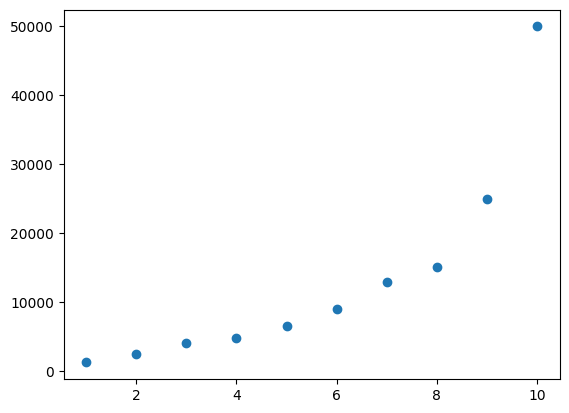

In [13]:
plt.scatter(data['years'],data['salary'])
plt.show()


Primero veo un modelo de regresion lineal para ver como predice yluego el de regresion polinomica apra ver como se ajuta de forma correcta el modelo

In [ ]:
X = data.iloc[:,1].valuues.reshape(-1,1)
y = data.iloc[-1]